In [1]:
%matplotlib inline
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(28, 28)
5
(60000,)


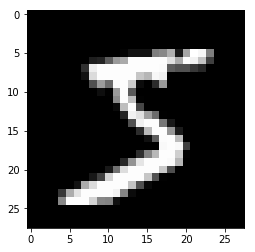

In [3]:
import matplotlib.pyplot as plt
img = x_train[0]
print(img.shape)
plt.imshow(img, cmap='gray')
print(y_train[0])
print(y_train.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

from keras.losses import categorical_crossentropy, mean_squared_error
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
num_of_train = x_train.shape[0]
x_train = x_train.reshape((num_of_train, 28, 28, 1))
num_of_test = x_test.shape[0]
x_test = x_test.reshape((num_of_test, 28, 28, 1))

print(x_train.shape, x_test.shape)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))


In [4]:
x = 5
keras.utils.to_categorical(x, 10)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])